2/24/24

This Notebook uses a lot of code from calcSimSystamatics (same directory), but compares a simulation and measurement from a monopole drive

- VNA is calibrated at end of chode cable. IE chode cable is calibrated out and refrence plane at at the bicon's port
- port 1 is bicon, 2 is monopole (both simulation and measurement). This was flipped for a sigle lab book entry on 2/23/24, but is now consistant
- data and calibration are saved in this directory. There are some notes in google doc lab book on 2_24_24


In [16]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

In [17]:
#pack df of measured data (from amin) from CSVs

import os
import pandas as pd

# Directory containing the CSV files
data_dir_new = '/drBigBoy/darkRadio/comsolSimulations/run1A_simulation_10_3_23/monopoleDriveSimValidation/data_2_24_24/'

# List of file indices to ignore
bad_data_idx = []

# Columns to extract from the CSV
columns_to_extract = ['Frequency', 'S11_Magnitude', 'S11_Phase', 'S22_Magnitude', 'S22_Phase', 'S12_Magnitude', 'S12_Phase']

# Initialize an empty DataFrame to hold the data
df_meas = pd.DataFrame()

# List all files in the directory that match the pattern and are not in the bad data index
for filename in os.listdir(data_dir_new):
    if filename.startswith('sParamData_p') and filename.endswith('.csv'):
        # Extract index from the filename and check if it's not in the bad data list
        file_idx = int(filename.split('p')[-1].split('.')[0])  # Extract the number after 'p'
        if file_idx not in bad_data_idx:
            # Construct full file path
            file_path = os.path.join(data_dir_new, filename)
            # Read the CSV file
            temp_df = pd.read_csv(file_path, usecols=columns_to_extract)
            # Add the index column
            temp_df['Index'] = file_idx
            # Append to the main DataFrame
            df_meas = pd.concat([df_meas, temp_df], ignore_index=True)

#VNA has glitch at 62.00MHz. Replace it with average of two adjacent bins
# Filter rows for the frequencies 61928888 and 62071111 across all indexes
adjacent_freqs_df = df_meas[df_meas['Frequency'].isin([61928888, 62071111])]

# Calculate the average for each S parameter for these frequencies by Index
avg_s_params = adjacent_freqs_df.groupby('Index').mean().drop(columns=['Frequency'])

# Replace the S parameters for frequency 62000000 Hz with the calculated averages
for idx, row in avg_s_params.iterrows():
    df_meas.loc[(df_meas['Frequency'] == 62000000) & (df_meas['Index'] == idx), ['S11_Magnitude', 'S11_Phase', 'S12_Magnitude', 'S12_Phase', 'S22_Magnitude', 'S22_Phase']] = row.values


df_meas['S11_Magnitude_Linear'] = 10 ** (df_meas['S11_Magnitude'] / 20.0)
df_meas['S22_Magnitude_Linear'] = 10 ** (df_meas['S22_Magnitude'] / 20.0)
df_meas['S12_Magnitude_Linear'] = 10 ** (df_meas['S12_Magnitude'] / 20.0)

# Now combined_df contains all the data from the CSV files excluding the bad indices
df_meas  # Show the first few rows of the DataFrame


,Frequency,S11_Magnitude,S11_Phase,S12_Magnitude,S12_Phase,S22_Magnitude,S22_Phase,Index,S11_Magnitude_Linear,S22_Magnitude_Linear,S12_Magnitude_Linear
0,30000000,-0.628958,-110.149200,-63.387707,124.521667,0.073693,-8.919846,1,0.930148,1.008520,0.000677
1,30071111,-0.556939,-110.888003,-62.130968,-160.615435,0.040615,-8.779317,1,0.937893,1.004687,0.000782
2,30142222,-0.553421,-111.636665,-62.072112,-160.859802,0.039601,-8.790695,1,0.938272,1.004570,0.000788
3,30213333,-0.552124,-112.382823,-62.415657,-159.112472,0.040514,-8.787249,1,0.938413,1.004675,0.000757
4,30284444,-0.550495,-113.128973,-62.016657,-160.111758,0.040436,-8.792294,1,0.938589,1.004666,0.000793
...,...,...,...,...,...,...,...,...,...,...,...
27001,349715555,-3.181907,-76.901338,-14.055223,-64.664886,-3.602410,-16.875152,0,0.693274,0.660510,0.198262
27002,349786666,-3.119329,-79.341003,-14.556986,-71.776869,-3.227963,-16.543676,0,0.698286,0.689607,0.187133
27003,349857777,-3.143696,-82.096404,-15.117572,-77.182794,-2.933673,-16.697719,0,0.696330,0.713373,0.175437
27004,349928888,-3.270208,-84.767497,-15.597995,-81.317801,-2.726958,-16.927262,0,0.686261,0.730554,0.165997


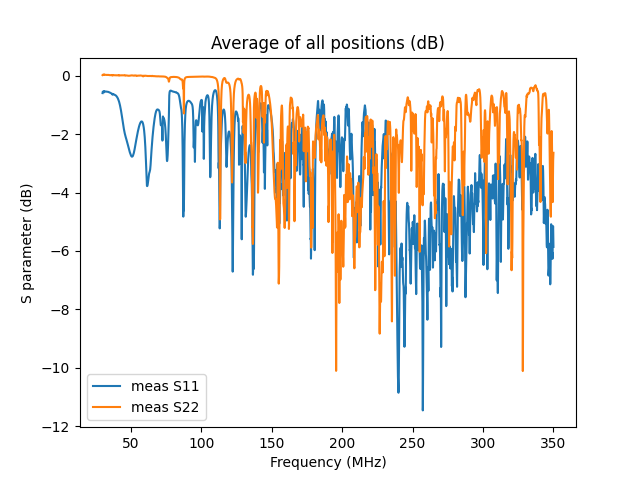

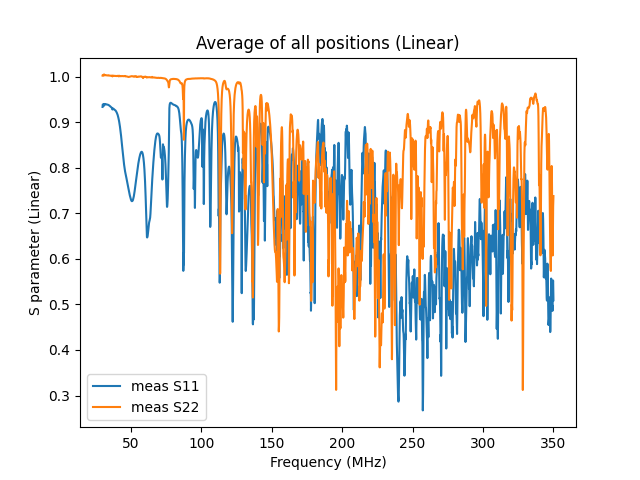

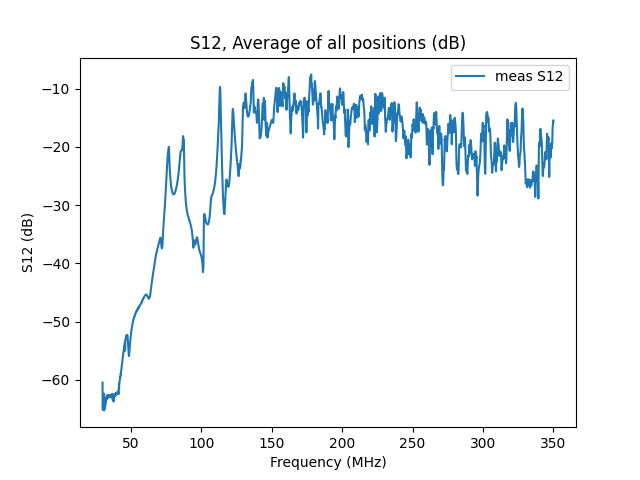

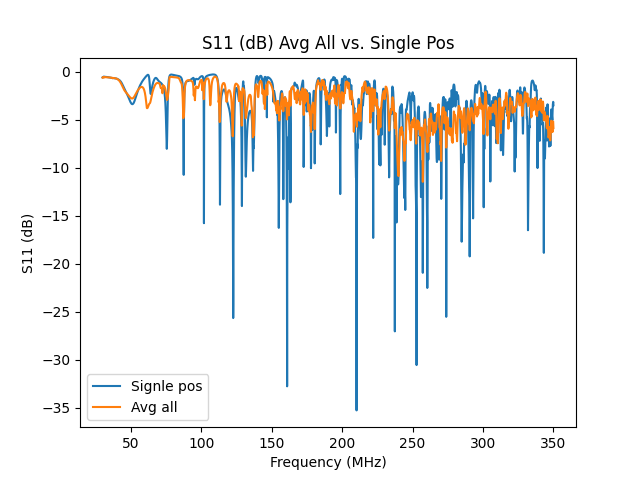

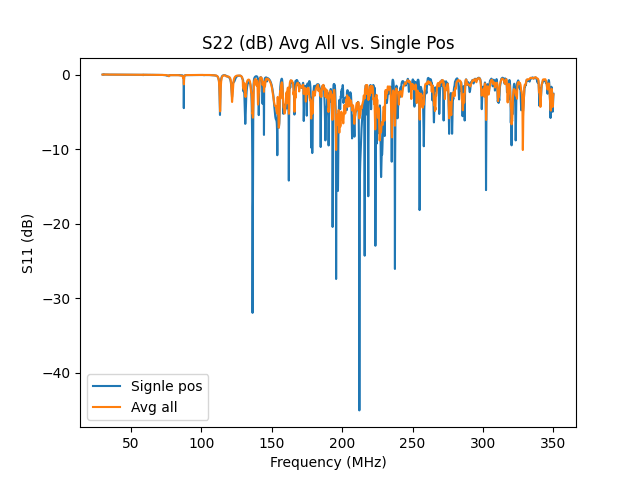

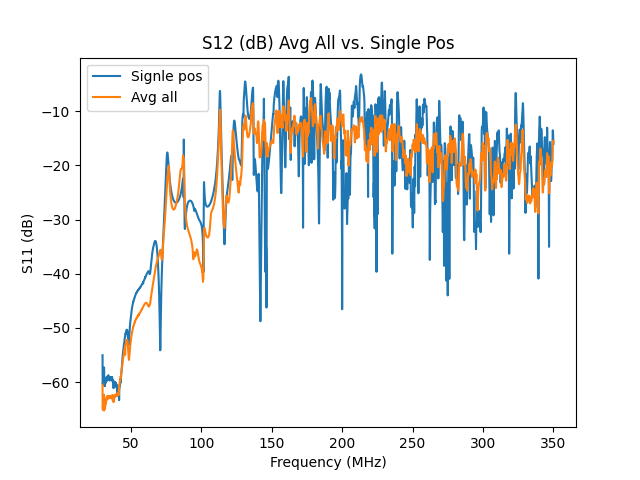

In [18]:
plt.close('all')

measured_s11_mean_all   = df_meas.groupby('Frequency')['S11_Magnitude_Linear'].mean()
measured_s22_mean_all   = df_meas.groupby('Frequency')['S22_Magnitude_Linear'].mean()
measured_s12_mean_all   = df_meas.groupby('Frequency')['S12_Magnitude_Linear'].mean()

measured_s11_pos0   = df_meas[df_meas['Index'] == 0].groupby('Frequency')['S11_Magnitude_Linear'].mean()
measured_s22_pos0   = df_meas[df_meas['Index'] == 0].groupby('Frequency')['S22_Magnitude_Linear'].mean()
measured_s12_pos0   = df_meas[df_meas['Index'] == 0].groupby('Frequency')['S12_Magnitude_Linear'].mean()


measured_freqs      = df_meas['Frequency'].unique()/1e6
#simulated_mean_all  = df_comsol.groupby('freq(MHz)')['s11'].mean()
#simulated_freqs     =df_comsol['freq(MHz)'].unique()

#filtered_df = df_comsol[df_comsol['positionIdx'].isin([0,2,4,6,8,10,12,14,16])]
#simulated_mean_9pos = filtered_df.groupby('freq(MHz)')['s11'].mean()

# Interpolate the simulated average onto the measured frequencies
#measured_interpolated_all = np.interp(simulated_freqs, measured_freqs, measured_mean_all, )

plt.figure()
plt.title("Average of all positions (dB)")
plt.plot(measured_freqs, 20*np.log10(measured_s11_mean_all), label = 'meas S11')
plt.plot(measured_freqs, 20*np.log10(measured_s22_mean_all), label = 'meas S22')
plt.xlabel('Frequency (MHz)')
plt.ylabel('S parameter (dB)')
plt.legend()

plt.figure()
plt.title("Average of all positions (Linear)")
plt.plot(measured_freqs, measured_s11_mean_all, label = 'meas S11')
plt.plot(measured_freqs, measured_s22_mean_all, label = 'meas S22')
plt.xlabel('Frequency (MHz)')
plt.ylabel('S parameter (Linear)')
plt.legend()

plt.figure()
plt.title("S12, Average of all positions (dB)")
plt.plot(measured_freqs, 20*np.log10(measured_s12_mean_all), label = 'meas S12')
plt.xlabel('Frequency (MHz)')
plt.ylabel('S12 (dB)')
plt.legend()

plt.figure()
plt.title("S11 (dB) Avg All vs. Single Pos")
plt.plot(measured_freqs, 20*np.log10(measured_s11_pos0), label = 'Signle pos')
plt.plot(measured_freqs, 20*np.log10(measured_s11_mean_all), label = 'Avg all')
plt.xlabel('Frequency (MHz)')
plt.ylabel('S11 (dB)')
plt.legend()

plt.figure()
plt.title("S22 (dB) Avg All vs. Single Pos")
plt.plot(measured_freqs, 20*np.log10(measured_s22_pos0), label = 'Signle pos')
plt.plot(measured_freqs, 20*np.log10(measured_s22_mean_all), label = 'Avg all')
plt.xlabel('Frequency (MHz)')
plt.ylabel('S11 (dB)')
plt.legend()

plt.figure()
plt.title("S12 (dB) Avg All vs. Single Pos")
plt.plot(measured_freqs, 20*np.log10(measured_s12_pos0), label = 'Signle pos')
plt.plot(measured_freqs, 20*np.log10(measured_s12_mean_all), label = 'Avg all')
plt.xlabel('Frequency (MHz)')
plt.ylabel('S11 (dB)')
plt.legend()